# 2D Ising Model Simulation
### James Saslow
### 2/2/2023

In [1]:
import numpy as np
import pylab as plt
import math

# Animation
from IPython.display import HTML
from math import floor
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [2]:
L = 50 # There are LxL spins in total
N = L*L
B = 8 # Inverse Temperature
t = 20000 # Number of time steps
J = 1 # Positive J = favors ferromagnetism & negative J = favors antiferromagnetism


# # Checkerboard spins
# I = np.zeros((L,L))
# for i in range(L):
#     for j in range(L):
#         I[i,j] = (-1)**(i+j)
        
# Random Spins
I = np.random.randint(2,size = (L,L))
for i in range(L):
    for j in range(L):
        if I[i,j] == 0:
            I[i,j] = -1


# #Ferromagnet
# I = np.ones((L,L))
    
    
print(I) # Initial spin state

I_list = [I] # keeping a record of all spin configurations

E = [0] # keeping a record of energy evolutions ... taking the energy of the initial state to be 0

[[-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ...  1 -1 -1]
 [ 1  1 -1 ...  1 -1 -1]
 ...
 [ 1 -1  1 ... -1 -1  1]
 [ 1 -1  1 ... -1  1  1]
 [-1 -1 -1 ...  1 -1 -1]]


### Implementing the Metropolis Algorithm

$dE = -J\sum_{<ij>} \sigma_{i}\sigma_{j}$ (A sum over the product of the spin with the spin's nearest neighbors)

#### Case 1:
If $dE < 0$, then we flip the spin with 100% probability


#### Case 2:
If $dE \geq 0$, then we flip the spin if the Boltzmann probability allows it $exp(\beta *dE)$

In [3]:
# Metropolis Algorithm

for k in range(t):
    # Selecting a lattice site at random
    i,j = np.random.randint(L), np.random.randint(L)

    # Calculating Energy change

    # If site is on a corner
    if i==0 and j==0:
        dE = J*2*I[i,j] * (I[i,j+1]+I[i+1,j])
    if i==0 and j==(L-1):
        dE = J*2*I[i,j] * (I[i+1,j]+I[i,j-1])
    elif i==(L-1) and j==0:
        dE = J*2*I[i,j] * (I[i,j+1]+I[i-1,j])
    elif i==(L-1) and j==(L-1):
        dE = J*2*I[i,j] * (I[i,j-1]+I[i-1,j])

    # If site is on a border
    elif i == 0 and j!=0 and j!=(L-1):
        dE = J*2*I[i,j] * (I[i,j+1]+I[i+1,j]+I[i,j-1])
    elif j == 0 and i!= 0 and i!= (L-1):
        dE = J*2*I[i,j] * (I[i,j+1]+I[i+1,j]+I[i-1,j])
    elif i == (L-1) and j!=0 and j!=(L-1):
        dE = J*2*I[i,j] * (I[i,j+1]+I[i,j-1]+I[i-1,j])
    elif j == (L-1) and i!=0 and i!=(L-1):
        dE = J*2*I[i,j] * (I[i+1,j]+I[i,j-1]+I[i-1,j])

    # If site is not on the border
    else:
        dE = J*2*I[i,j] * (I[i,j+1]+I[i+1,j]+I[i,j-1]+I[i-1,j])


    I_copy = np.copy(I)
    if dE < 0:
        # Lower energy state
        I_copy[i,j] = -I[i,j] # Flip the spin
        E.append(E[-1]+dE)
    if dE >= 0:
        if np.random.random() < np.exp(-B*dE):
           # Higher energy state, but Boltzmann probability says that it's ok
            I_copy[i,j] = -I[i,j] # Flip the spin
            E.append(E[-1]+dE)
        else:
            E.append(E[-1])

    I_list.append(I_copy)
    I = np.copy(I_list[-1])

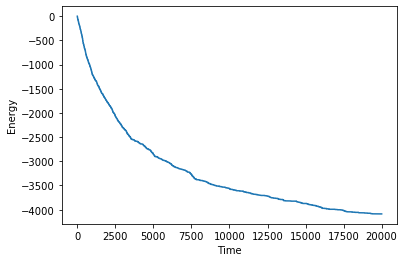

In [4]:
plt.plot(E)
plt.ylabel('Energy')
plt.xlabel('Time')
plt.show()

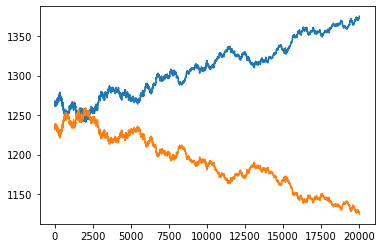

In [5]:
pos_spin_count = []
neg_spin_count = []
for i in range(t+1):
    pos_spin_count.append(np.count_nonzero(I_list[i] == 1 ))
    neg_spin_count.append(np.count_nonzero(I_list[i] == -1))

    
plt.plot(pos_spin_count)
plt.plot(neg_spin_count)

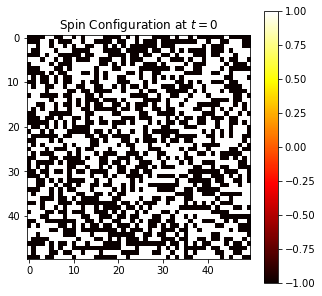

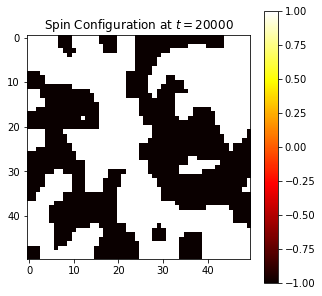

In [6]:
plt.figure(figsize = (5,5))
plt.title('Spin Configuration at $t=0$')
plt.imshow(I_list[0], cmap = 'hot')
plt.colorbar()
plt.show()

plt.figure(figsize = (5,5))
plt.title('Spin Configuration at $t='+str(t)+'$')
plt.imshow(I_list[-1], cmap = 'hot')
plt.colorbar()
plt.show()

In [7]:
time = []
skip = 100
film = []
for i in range(0,t+1,skip):
    film.append(I_list[i])
    time.append(i*skip)


def update(i):
    hot.set_array(film[floor(i)])
    

fig, ax = plt.subplots(figsize = (6,6))
plt.title('\u03B2'+'='+str(B) )
hot = ax.matshow(film[0],cmap = 'hot')
plt.xlim(0,L)
plt.ylim(0,L)
plt.colorbar(hot)
plt.close()

#%matplotlib inline

ani = animation.FuncAnimation(fig, update, frames=len(film), interval=30)
HTML(ani.to_jshtml())